In [7]:
# Auto-reload modules
# Source: https://ipython.org/ipython-doc/dev/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# Display all of code cell's output instead of just the print statements and the last line 
# Source: https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Libraries

Why write code if you don't have to? Luckily, Python has many community-contributed libraries so that there's often a library that will make your life easier.

Using a library has many advantages. Here are some

1. Efficiency: Libraries provide pre-written code for common tasks, saving time and effort in development.
2. Functionality: They offer specialized functions and classes that simplify complex tasks, like data manipulation, web scraping, or machine learning.
3. Reliability: Established libraries are often well-tested and maintained by a community, reducing the risk of bugs.
4. Interoperability: Many libraries integrate seamlessly with other tools and frameworks, enhancing flexibility.
5. Community Support: Being part of a larger ecosystem means access to forums, documentation, and updates.

# Prerequisites

This notebooks uses some libraries that aren't included in Python's standard library. So make sure you install the right packages. To install the dependencies, you can use the `conda`-created `environment.yaml` that's included in the repo.

# Pandas (and a bit of SciPy and scikit-learn)

Pandas is a library that's used all over the place in the Python data handling, cleaning, processing, transformation, and analysis worlds. It integrates easily with other common libraries like NumPy, SciPy, and scikit-learn.

In [8]:
import pandas as pd  # we rename pandas to pd just to make it easier to type; this is common to see
from scipy import stats

# Load the data
agro_data = pd.read_csv("./Agrofood_co2_emission.csv")

In [53]:
# Displaying data
type(agro_data) 
agro_data.head(n=10) 
agro_data.tail() 
agro_data.shape 
agro_data.columns
agro_data.dtypes

pandas.core.frame.DataFrame

,country,year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
5,Afghanistan,1995,14.7237,0.0557,243.8152,666.40,0.0,11.712073,54.6445,-2388.803,...,397.5498,0.0,0.0,NaN,13401971.0,3697570.0,8219467.0,8199445.0,2624.612529,0.285583
6,Afghanistan,1996,38.9302,0.2014,249.0364,686.00,0.0,11.712073,53.1637,-2388.803,...,465.2050,0.0,0.0,NaN,13952791.0,3870093.0,8569175.0,8537421.0,2838.921329,0.036583
7,Afghanistan,1997,30.9378,0.1193,276.2940,705.60,0.0,11.712073,52.0390,-2388.803,...,511.5927,0.0,0.0,NaN,14373573.0,4008032.0,8916862.0,8871958.0,3204.180115,0.415167
8,Afghanistan,1998,64.1411,0.3263,287.4346,705.60,0.0,11.712073,52.7050,-2388.803,...,541.6598,0.0,0.0,NaN,14733655.0,4130344.0,9275541.0,9217591.0,3560.716661,0.890833
9,Afghanistan,1999,46.1683,0.0895,247.4980,548.80,0.0,11.712073,35.7630,-2388.803,...,611.0611,0.0,0.0,NaN,15137497.0,4266179.0,9667811.0,9595036.0,3694.806533,1.058500


,country,year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,...,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


(6965, 31)

Index(['country', 'year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

country                             object
year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

***PAUSE***: check out the [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) documentation.

In [23]:
# Getting subsets of your data
agro_data[["Area", "Year"]]
agro_data[["Area", "Year"]].iloc[4:8, :]

,Area,Year
0,Afghanistan,1990
1,Afghanistan,1991
2,Afghanistan,1992
3,Afghanistan,1993
4,Afghanistan,1994
...,...,...
6960,Zimbabwe,2016
6961,Zimbabwe,2017
6962,Zimbabwe,2018
6963,Zimbabwe,2019


,Area,Year
4,Afghanistan,1994
5,Afghanistan,1995
6,Afghanistan,1996
7,Afghanistan,1997


In [ ]:
agro_data["Area"].unique() # as opposed to something like set(agro_data["Area"].unique())

In [26]:
# Subsetting by "boolean mask" 
agro_data["Area"] == "Romania"
romanian_df = agro_data[agro_data["Area"] == "Romania"]
romanian_df

0       False
1       False
2       False
3       False
4       False
        ...  
6960    False
6961    False
6962    False
6963    False
6964    False
Name: Area, Length: 6965, dtype: bool

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
5202,Romania,1990,6.7654,11.3361,1055.9567,312.8160,536.7635,891.0,997.8964,0.0000,...,4552.8334,0.0,0.0,6156.1269,10988961.0,12500412.0,11148927.0,11687307.0,51712.4822,1.098833
5203,Romania,1991,6.7654,11.3361,1093.4549,169.3362,536.7635,629.0,885.3348,0.0000,...,4326.8992,0.0,0.0,5086.3561,10805409.0,12648804.0,11148885.0,11693597.0,45725.1671,-0.267083
5204,Romania,1992,6.7654,11.3361,754.1263,128.5211,536.7635,485.0,990.7851,0.0000,...,3845.9871,0.0,0.0,3182.5047,10698762.0,12674596.0,11123814.0,11677149.0,44009.5120,0.485167
5205,Romania,1993,6.7654,11.3361,934.8009,94.1506,536.7635,828.0,834.2827,0.0000,...,3330.6187,0.0,0.0,2507.8915,10680466.0,12575529.0,11078754.0,11642902.0,40827.7231,-0.124583
5206,Romania,1994,6.7654,11.3361,1062.6595,36.3619,536.7635,729.0,864.4398,0.0000,...,3281.6049,0.0,0.0,1695.1024,10651531.0,12464644.0,11027789.0,11604987.0,38511.1297,1.566917
5207,Romania,1995,6.7654,11.3361,1150.5173,48.3414,535.1008,588.0,710.1278,0.0000,...,2937.4359,0.0,0.0,2079.3667,10616987.0,12348124.0,10969846.0,11563288.0,40193.0957,0.283750
5208,Romania,1996,1.9300,37.7647,816.9120,66.8909,535.1008,455.0,958.3890,0.0000,...,2991.1849,0.0,0.0,1762.4507,10577463.0,12226702.0,10903157.0,11514711.0,39891.0057,-0.363583
5209,Romania,1997,0.3713,31.3457,1221.7137,31.2502,535.1008,343.0,975.2376,0.0000,...,2992.7117,0.0,0.0,2022.5991,10532520.0,12100285.0,10829746.0,11459789.0,37624.4087,-0.314167
5210,Romania,1998,0.4232,32.5765,916.6151,13.5318,535.1008,334.0,911.6614,0.0000,...,2767.2522,0.0,0.0,1755.3027,10485543.0,11972534.0,10755933.0,11405309.0,32969.5318,0.369917
5211,Romania,1999,1.6615,31.8865,952.5527,12.2382,540.2823,222.0,774.4239,0.0000,...,2762.9296,0.0,0.0,1030.4327,10440251.0,11847806.0,10685761.0,11353246.0,30756.0598,1.053333


In [38]:
# Creating new columns and doing math with columns
romanian_df["total_fires"] = romanian_df["Savanna fires"] + romanian_df["Forest fires"]
romanian_df[["Savanna fires", "Forest fires", "total_fires"]].biloc[:3]

/var/folders/wt/l509j2v13614w84pwcgyhw9w0000gp/T/ipykernel_41534/1972565496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romanian_df["total_fires"] = romanian_df["Savanna fires"] + romanian_df["Forest fires"]


,Savanna fires,Forest fires,total_fires
5202,6.7654,11.3361,18.1015
5203,6.7654,11.3361,18.1015
5204,6.7654,11.3361,18.1015


## Exercise 1 - by yourself or in groups

1. Create a dataframe from `agro_data` with the columns "Manure applied to Soils", "Manure left on Pasture", and "Manure Management" with only the rows that correspond to Canada
2. What is the mean (using a DataFrame method) of each of those three columns?

In [20]:
manure_colms = ["Manure applied to Soils", "Manure left on Pasture", "Manure Management"]
canada_manure = agro_data[["Area"] + manure_colms][
    agro_data["Area"] == "Canada"
]

canada_manure.head(2)

for colm in manure_colms:
    type(canada_manure[colm])
    canada_manure[colm].mean()

,Area,Manure applied to Soils,Manure left on Pasture,Manure Management
1108,Canada,1294.8516,3835.7051,6842.7669
1109,Canada,1290.3982,3874.4090,6720.0932


pandas.core.series.Series

np.float64(1425.2148483870967)

pandas.core.series.Series

np.float64(4454.188825806451)

pandas.core.series.Series

np.float64(7441.247487096774)

## Exercise 2 - together

Say you want to combine the agricultural data and GDP data so you can look at things how GDP varies with different columns in the agricultural data. Let's figure out how to combine the datasets by joining on the country and year.

In [22]:
gdp_data = pd.read_csv("gdp.csv")
gdp_data.head(2)

,Entity,Code,Year,GDP (constant 2015 US$)
0,Afghanistan,AFG,2002,7228796000
1,Afghanistan,AFG,2003,7867263500


In [23]:
gdp_data.rename(columns={"Entity": "country", "GDP (constant 2015 US$)": "gdp", "Year": "year"}, inplace=True)
agro_data.rename(columns={"Area": "country", "GDP (constant 2015 US$)": "gdp", "Year": "year"}, inplace=True)
gdp_data.head(2)
agro_data.head(2)

,country,Code,year,gdp
0,Afghanistan,AFG,2002,7228796000
1,Afghanistan,AFG,2003,7867263500


,country,year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667


Pandas has a method for merging dataframes: [pd.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [24]:
pd.merge(gdp_data, agro_data, how="inner", on=["year", "country"])

,country,Code,year,gdp,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,AFG,2002,7228796000,9.0562,0.0000,266.1975,529.2000,0.0,11.712073,...,592.5613,0.0,0.0,NaN,17086910.0,4893013.0,10562202.0,10438055.0,6035.816468,1.084167
1,Afghanistan,AFG,2003,7867263500,55.8052,0.0000,324.2195,568.4000,0.0,11.712073,...,603.1024,0.0,0.0,NaN,17909063.0,5155788.0,11397483.0,11247647.0,6449.089231,0.679333
2,Afghanistan,AFG,2004,7978515500,11.9759,0.0000,266.9995,764.4000,0.0,11.712073,...,576.0374,0.0,0.0,NaN,18692107.0,5426872.0,11862726.0,11690825.0,6734.998231,1.398833
3,Afghanistan,AFG,2005,8874481000,5.3259,0.0000,383.7498,627.2000,0.0,11.983047,...,604.7668,0.0,0.0,NaN,19378962.0,5691836.0,12302104.0,12109086.0,7001.297527,0.457333
4,Afghanistan,AFG,2006,9349922000,4.4081,0.0000,333.6093,627.2000,0.0,12.931389,...,626.2428,0.0,0.0,NaN,19961972.0,5931478.0,12828447.0,12614497.0,7076.181947,1.477333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,Zimbabwe,ZWE,2016,20142980000,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
5287,Zimbabwe,ZWE,2017,20964866000,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
5288,Zimbabwe,ZWE,2018,22015179000,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
5289,Zimbabwe,ZWE,2019,20621079000,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


## Exercise 3 - by yourself or in groups

Is there a statistical (p < 0.05) difference between the average temperatures in Argentina and in Mexico from 2000-present? 

For this we can use the [SciPy](https://scipy.org/) library which "provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems."

You can use [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind) to test whether the averages are different. You can use [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#normaltest) to test whether a sample is normally distributed.

In [27]:
(agro_data["country"] == "Argentina") & (agro_data["Year"] >= 2000)

0       False
1       False
2       False
3       False
4       False
        ...  
6960    False
6961    False
6962    False
6963    False
6964    False
Name: country, Length: 6965, dtype: bool

In [30]:
# To get you started...
argentina_temps = agro_data[(agro_data["country"] == "Argentina") & (agro_data["year"] >= 2000)]
mexico_temps = agro_data[(agro_data["Area"] == "Mexico") & (agro_data["Year"] >= 2000)]["Average Temperature °C"]
argentina_temps

,country,year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
258,Argentina,2000,6818.4625,2341.6242,3509.9086,1482.1520,5154.3491,2565.0,4012.1942,-40102.7293,...,1974.6752,0.0,1029.1878,8899.1807,4023693.0,33033759.0,18280746.0,18790028.0,125662.4164,-0.206917
259,Argentina,2001,5555.9338,368.9446,3867.5141,1190.6608,5172.8819,2932.0,3587.3660,-35904.1100,...,1977.1268,0.0,218.3179,8326.9327,3998739.0,33472770.0,18484124.0,18996369.0,172527.3100,0.480583
260,Argentina,2002,3422.7440,370.1122,3982.6313,972.2384,5205.6978,3435.0,3502.2053,-35904.1100,...,2030.0378,0.0,146.0976,8395.3459,3974741.0,33914629.0,18683681.0,19201347.0,171618.6910,0.233750
261,Argentina,2003,4508.8015,538.3940,4074.9288,1041.8576,5214.1013,3969.0,3379.4757,-35904.1100,...,2143.1150,0.0,288.9798,9693.4867,3951197.0,34358182.0,18879701.0,19398462.0,179134.7615,0.563917
262,Argentina,2004,2850.2854,690.3494,4144.1416,1326.3555,5210.0713,4707.0,3709.2319,-35904.1100,...,2177.2094,0.0,297.7794,11889.3405,3927028.0,34801668.0,19077001.0,19591796.0,183958.8922,0.583583
263,Argentina,2005,2117.7708,583.9524,4771.5106,1246.0739,5197.0239,4951.0,3989.6423,-35904.1100,...,2219.8865,0.0,251.7815,15883.5885,3902354.0,35243134.0,19279145.0,19791355.0,189627.2057,0.228417
264,Argentina,2006,2191.8526,515.5174,4475.2982,1325.1560,5198.8975,5356.0,4421.3458,-35904.1100,...,2305.7266,0.0,160.4116,11520.1690,3876846.0,35682044.0,19484104.0,19992747.0,189543.2299,0.669083
265,Argentina,2007,2170.6834,505.2612,5277.9343,1290.7384,5198.0361,6090.0,4464.8701,-35904.1100,...,2320.7661,0.0,247.2355,10121.1439,3850764.0,36119460.0,19685381.0,20190731.0,190967.4029,-0.195750
266,Argentina,2008,2767.1404,574.2262,5430.2776,1430.4864,5212.2518,6737.0,4743.0185,-35904.1100,...,2286.3380,0.0,156.1026,14333.5399,3824321.0,36558068.0,19886051.0,20387718.0,197788.7747,0.660083
267,Argentina,2009,1945.3645,739.3539,3819.4946,1519.3920,5210.3648,4471.0,4273.1279,-35904.1100,...,2192.7777,0.0,299.6116,13781.8593,3798178.0,37001229.0,20095357.0,20588982.0,192204.9740,0.748750


## Exercise 4 - by yourself or in groups

The [Iris dataset](https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html) is a dataset consisting of measurements of the sepal length and width and pedal lengh and width of three different types of irises. It's often used as an example dataset in "intro to machine learning using Pandas"-type tutorials. The library [scikit-learn](https://scikit-learn.org/stable/) is standard ML library in Python. The Iris dataset is loaded from the scikit-learn library in the code cell below. Do the following:

1. Create a dataframe that has five columns: (1) sepal length, (2) sepal width, (3) pedal length, (4) pedal width, (5) column for the indicator column that indicates which type of iris a given row corresponds to. If we think about the dataset from the perspective of "predict the type of Iris from the sepal and pedal measurements" than the sepal and pedal measurements are called the ***predictors*** (a.k.a. independent variables) and the 5th, indicator column is called the ***response*** (a.k.a. depedent variable). 
2. Replace the four measurement columns with their "[z-score](https://en.wikipedia.org/wiki/Standard_score)" where you subtract the mean and divide by the standard deviation.
3. Save your new dataframe from (2) as a semicolon (";") separated file without the index (hint: use `pd.DataFrame.to_csv(sep=";", index=False)`)
4. Start exploring some of scikit-learn's ML functionalities via the Iris dataset. Here are some examples of things you could do:
    - Perform [PCA](https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html) on the predictors and see if the three iris species are well separated in the lower dimensional subspace of the first 2 or 3 PCA components. 
    - Explore different classifiers (e.g., [k-nearest neighbors](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [support-vector machines](https://scikit-learn.org/1.5/modules/svm.html)) that predict iris species from the sepal and pedal measurement predictors. You could compare different classifiers' performances via [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). 


In [58]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris["data"]

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## References

- To visualize how pandas transforms data: [here](https://pandastutor.com/vis.html)

## Potential additional topics

- `pd.Series`
- `.apply`
- Saving data
- 

# Matplotlib - plotting

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_csv('Agrofood_co2_emission.csv', sep=',')

## Line plot

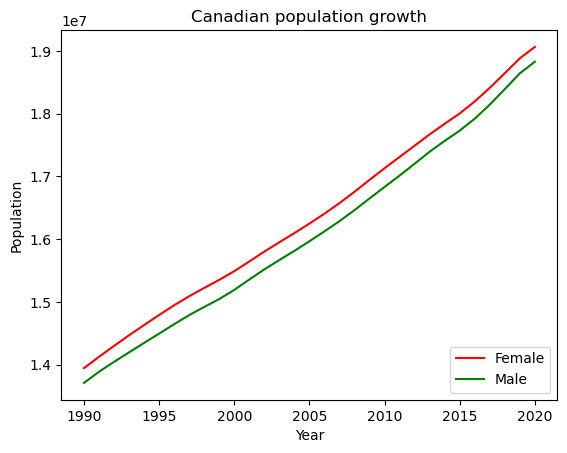

In [9]:
# get just the Canadian data
can_df = df[df['Area'] == 'Canada']

# lets plot 'Total Population - Female' over time
fig, ax = plt.subplots(nrows=1, ncols=1)
_=ax.plot(
    can_df['Year'], can_df['Total Population - Female'],
    label='Female',
    color='red'
)
_=ax.plot(
    can_df['Year'], can_df['Total Population - Male'],
    label='Male',
    color='green'
)
_=ax.set_xlabel('Year')
_=ax.set_ylabel('Population')
_=ax.set_title('Canadian population growth')
_=ax.legend(loc='lower right')
plt.show()

## Histogram

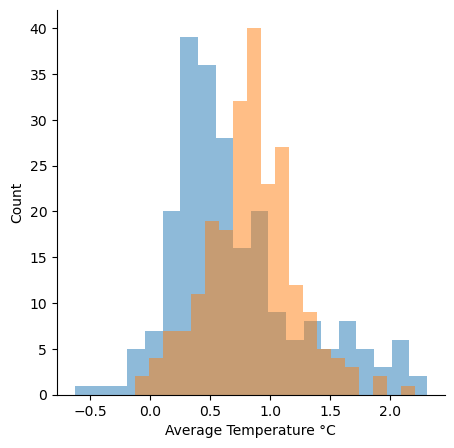

In [24]:
temps_in_2000 = df[df['Year'] == 2000]['Average Temperature °C']
temps_in_2005 = df[df['Year'] == 2005]['Average Temperature °C']

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 5)
_=ax.hist(
    temps_in_2000, 
    bins=20, 
    lw=5, 
    alpha=0.5,
)
_=ax.hist(
    temps_in_2005, 
    bins=20, 
    lw=5, 
    alpha=0.5
)
_=ax.set_xlabel('Average Temperature °C')
_=ax.set_ylabel('Count')
_=ax.spines[['right', 'top']].set_visible(False) # remove borders
plt.savefig('hist.png', dpi=300)
plt.show()


## Box plot

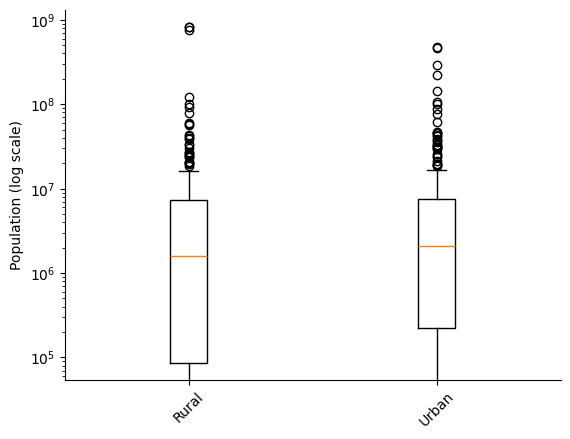

In [43]:

fig, ax = plt.subplots()

_=ax.boxplot([
    df[df["Year"] == 2000]['Rural population'],
    df[df["Year"] == 2000]['Urban population']
])
_=ax.set_yscale('log')
_=ax.set_xticklabels(['Rural', 'Urban'], rotation=45)
_=ax.set_ylabel('Population (log scale)')
_=ax.spines[['right', 'top']].set_visible(False)
plt.show()

## Multipanel plots

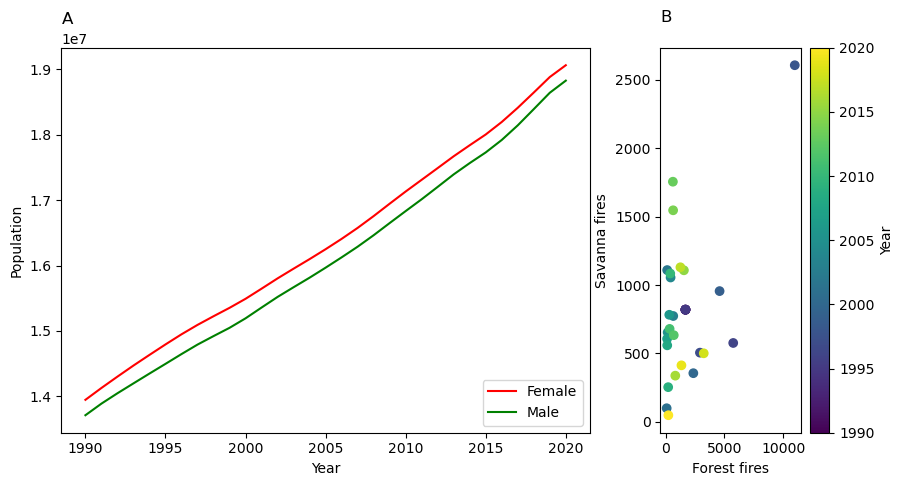

In [36]:
can_df = df[df['Area'] == 'Canada']

fig, axs = plt.subplots(1, 2, width_ratios=[3, 1])
_=fig.set_size_inches(10, 5)
_=axs[0].plot(
    can_df['Year'], can_df['Total Population - Female'],
    label='Female',
    color='red'
)
_=axs[0].plot(
    can_df['Year'], can_df['Total Population - Male'],
    label='Male',
    color='green'
)
_=axs[0].set_xlabel('Year')
_=axs[0].set_ylabel('Population')
_=axs[0].legend(loc='lower right')
_=axs[0].set_title('A', loc='left')

scatter_plot = axs[1].scatter(
    can_df['Forest fires'], can_df['Savanna fires'],
    c=can_df['Year']
)
_=axs[1].set_xlabel('Forest fires')
_=axs[1].set_ylabel('Savanna fires')
_=axs[1].set_title('B\n',loc='left')

_=fig.colorbar(scatter_plot, label='Year', ax=axs[1])
plt.show()

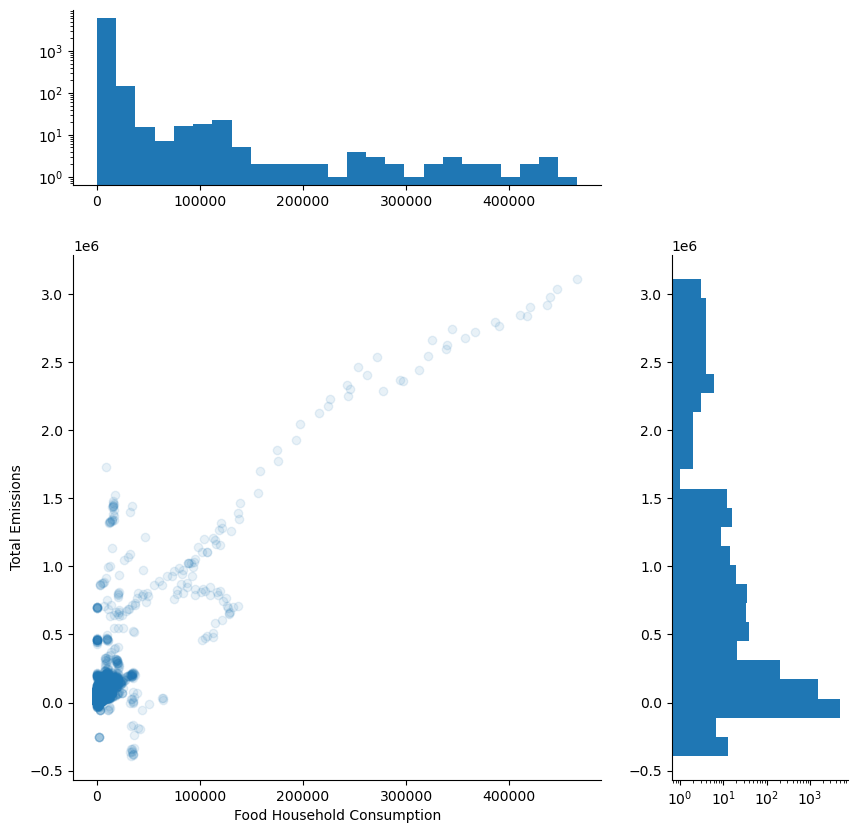

In [37]:
fig, axs = plt.subplots(
    nrows=2, ncols=2, 
    width_ratios=[3, 1], 
    height_ratios=[1, 3]
)
fig.set_size_inches(10, 10)

_=axs[1,0].scatter(
    df['Food Household Consumption'], df['total_emission'],
    alpha=0.1
)
_=axs[1,0].set_xlabel('Food Household Consumption')
_=axs[1,0].set_ylabel('Total Emissions')
_=axs[1,0].spines[['right', 'top']].set_visible(False)

_=axs[0,0].hist(df['Food Household Consumption'], bins=25)
_=axs[0,0].set_yscale('log')
_=axs[0,0].spines[['right', 'top']].set_visible(False)

_=axs[1,1].hist(
    df['total_emission'],
    orientation='horizontal',
    bins=25
)
_=axs[1,1].set_xscale('log')
_=axs[1,1].spines[['right', 'top']].set_visible(False)

_=axs[0,1].set_axis_off()

plt.savefig('beautiful_plot.png',dpi=300)
plt.show()

## Exercise

Start homework 8. 